# Praca domowa nr 4
## Justyna Jankowiak

## Informacje o danych

#### Pobrane kolumny:

* DayOfWeek	- Day of Week
* FlightDate - Flight Date (yyyymmdd)
* AirlineID	- An identification number assigned by US DOT to identify a unique airline (carrier).
* OriginAirportID - Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
* Origin - Origin Airport
* OriginCityName - Origin Airport, City Name		 
* OriginState - Origin Airport, State Code
* DestAirportID	- Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
* Dest - Destination Airport
* DestCityName - Destination Airport, City Name		 
* DestState - Destination Airport, State Code
* CRSDepTime - CRS Departure Time (local time: hhmm)		 
* DepTime - Actual Departure Time (local time: hhmm)		 
* DepDelay - Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
* DepartureDelayGroups - Departure Delay intervals, every (15 minutes from <-15 to >180)
* CRSArrTime - CRS Arrival Time (local time: hhmm)		 
* ArrTime - Actual Arrival Time (local time: hhmm)		 
* ArrDelay - Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
* ArrivalDelayGroups - Arrival Delay intervals, every (15-minutes from <-15 to >180)
* Cancelled	- Cancelled Flight Indicator (1=Yes)
* CancellationCode - Specifies The Reason For Cancellation
* Diverted - Diverted Flight Indicator (1=Yes)		
* Distance - Distance between airports (miles)
* CarrierDelay	Carrier Delay, in Minutes		 
* WeatherDelay	Weather Delay, in Minutes		 
* NASDelay	National Air System Delay, in Minutes		 
* SecurityDelay	Security Delay, in Minutes		 
* LateAircraftDelay	Late Aircraft Delay, in Minutes

#### Okres, z którego pochodzą dane

* 960271134_T_ONTIME_2005 - styczeń 2005
* 960271134_T_ONTIME_2015 - styczeń 2015

#### Tabele pomocnicze

* L_WEEKDAYS - DayOfWeek
* L_AIRLINE_ID - AirlineID
* L_AIRPORT_ID - OriginAirportID
* L_AIRPORT - Origin
* L_STATE_ABR_AVIATION - OriginState
* L_ONTIME_DELAY_GRUOPS - DepartureDelayGroups
* L_CANLELLATION - CancellationCode

## Analiza
### Wczytanie odpowiednich bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Wczytanie danych

In [2]:
#podstawowe dane
dane2005 = pd.read_csv("960271134_T_ONTIME_2005.csv")
dane2015 = pd.read_csv("960271134_T_ONTIME_2015.csv")

#tabele pomocnicze
weekdays = pd.read_csv("L_WEEKDAYS.csv")
airline_id = pd.read_csv("L_AIRLINE_ID.csv")
airport_id = pd.read_csv("L_AIRPORT_ID.csv")
airport = pd.read_csv("L_AIRPORT.csv")
states = pd.read_csv("L_STATE_ABR_AVIATION.csv")
delay = pd.read_csv("L_ONTIME_DELAY_GROUPS.csv")
cancel = pd.read_csv("L_CANCELLATION.csv")

### Próbka danych
Dane z 2005 i 2015 roku wyglądają identycznie, różnią się tylko tym, że są z różnego okresu. Czasami będę analizowć tylko jeden zbiór a czasami oba, gdy będę chciała porównać zmianę danego czynnika/wartości w czasie.

In [3]:
dane2005.head()

,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 28
0,1,2005-01-03,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,0,0,28,0,0,NaN
1,1,2005-01-10,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2005-01-17,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,0,0,53,0,0,NaN
3,1,2005-01-24,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2005-01-31,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dane2015.head()

,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 28
0,1,2015-01-05,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-12,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2015-01-19,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2015-01-26,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2015-01-05,19805,12892,LAX,"Los Angeles, CA",CA,12478,JFK,"New York, NY",...,0,NaN,0,2475,NaN,NaN,NaN,NaN,NaN,NaN


Dane z pozostałych tabel to tabele pomocnicze, które można rozumieć tak naprawdę jako słowniki dla kodów/skrótów użytych w danych "głównych", np.:

In [5]:
delay.head()

,Code,Description
0,-2,Delay < -15 minutes
1,-1,Delay between -15 and -1 minutes
2,0,Delay between 0 and 14 minutes
3,1,Delay between 15 to 29 minutes
4,2,Delay between 30 to 44 minutes


## Pytania i odpowiedzi
Analizę wykonam dosyć randomowo, po prostu zadałam sobie pytania, na które chciałabym poznać odpowiedź analizując dane.

### Ile lotów zarejestrowano w styczniu 2005 i styczniu 2015?

In [6]:
ile_lotow_2005 = dane2005.shape[0]
ile_lotow_2015 = dane2015.shape[0]
print("Liczba lotów zarejestrowanych w styczniu 2005 wyniosła " + str(ile_lotow_2005) + " natomiast w 2015 roku " + str(ile_lotow_2015))

Liczba lotów zarejestrowanych w styczniu 2005 wyniosła 594924 natomiast w 2015 roku 469968


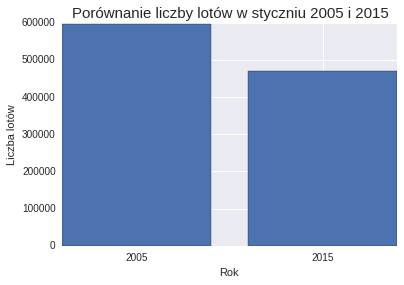

In [7]:
width = 0.8
ind = np.arange(2)
plt.bar(left = ind, height = (ile_lotow_2005, ile_lotow_2015), width = width)
plt.title('Porównanie liczby lotów w styczniu 2005 i 2015', fontsize = 15)
plt.ylabel('Liczba lotów')
plt.xlabel('Rok')
plt.xticks(ind + width/2., ('2005', '2015'))
plt.show()

### W jakie dni tygodnia samoloty latają najczęściej? (2015)

In [8]:
ile_w_dzien = dane2015.groupby("DAY_OF_WEEK")["DAY_OF_WEEK"].count()
ile_w_dzien = pd.DataFrame(ile_w_dzien)
ile_w_dzien

,DAY_OF_WEEK
DAY_OF_WEEK,
1,64167
2,60837
3,62141
4,78022
5,80955
6,64165
7,59681


In [9]:
#usuwam nazwę indeksu, żeby było ładniej i zmieniam nazwę kolumny
del ile_w_dzien.index.name
ile_w_dzien.columns = ['DAY_OF_WEEK_count']
ile_w_dzien

,DAY_OF_WEEK_count
1,64167
2,60837
3,62141
4,78022
5,80955
6,64165
7,59681


In [10]:
weekdays_cp = weekdays.copy()
weekdays_cp

,Code,Description
0,1,Monday
1,2,Tuesday
2,3,Wednesday
3,4,Thursday
4,5,Friday
5,6,Saturday
6,7,Sunday
7,9,Unknown


In [11]:
#ustawiamy kolumnę Code jako indeks
weekdays_cp2 = weekdays_cp.set_index(weekdays_cp["Code"])
del weekdays_cp2.index.name
weekdays_cp2 = weekdays_cp2.drop("Code", 1)
weekdays_cp2

,Description
1,Monday
2,Tuesday
3,Wednesday
4,Thursday
5,Friday
6,Saturday
7,Sunday
9,Unknown


In [12]:
#łączymy tabele po indeksie
ile_w_dzien_join = weekdays_cp2.join(ile_w_dzien)
ile_w_dzien_join

,Description,DAY_OF_WEEK_count
1,Monday,64167
2,Tuesday,60837
3,Wednesday,62141
4,Thursday,78022
5,Friday,80955
6,Saturday,64165
7,Sunday,59681
9,Unknown,NaN


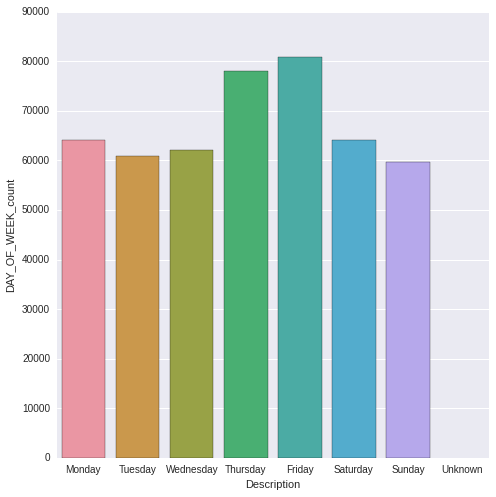

In [13]:
bar = sns.factorplot(x = 'Description', y = 'DAY_OF_WEEK_count', 
               kind = "bar", size = 7, data = ile_w_dzien_join)

Najwięcej lotów odbyło się w piątki, a najmniej w niedzielę.

### Wykres ilości lotów w poszczególne dni miesiąca (2015)

In [14]:
codziennie = pd.DataFrame(dane2015.FL_DATE.value_counts())
#sortujemy wg daty
codziennie_sort = codziennie.sort_index()
codziennie_sort.head(10)

,FL_DATE
2015-01-01,13950
2015-01-02,16741
2015-01-03,15434
2015-01-04,16352
2015-01-05,16548
2015-01-06,15315
2015-01-07,15571
2015-01-08,16009
2015-01-09,16008
2015-01-10,12344


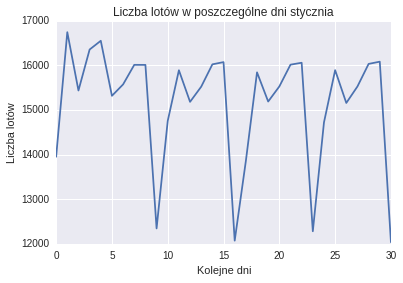

In [15]:
#szereg czasowy - łatwiej jeżeli na osi x nie będzie całych dat, tylko dni więc zostawiam w ten sposób
ts = sns.tsplot(data = codziennie_sort.FL_DATE)
plt.title("Liczba lotów w poszczególne dni stycznia")
plt.xlabel('Kolejne dni')
plt.ylabel('Liczba lotów')
plt.show()

In [16]:
#widać ciekawą sezonowość - cztery najmniejsze wartości to daty dokładnie co tydzień
codziennie.sort_values("FL_DATE").head(4).sort_index()

,FL_DATE
2015-01-10,12344
2015-01-17,12070
2015-01-24,12280
2015-01-31,12037


In [17]:
#jaki to dzień tygodnia?
ktory_dzien = pd.DataFrame(dane2015.DAY_OF_WEEK[dane2015.FL_DATE == "2015-01-10"].head(1))
ktory_dzien
pd.merge(ktory_dzien, weekdays_cp, how = "left", left_on = "DAY_OF_WEEK", right_on = "Code")

,DAY_OF_WEEK,Code,Description
0,6,6,Saturday


Widać znaczny spadek ilości lotów w soboty. Jednak sumarycznie wyszło nam, że to w niedzielę jest najmniej lotów (patrz poprzedni wykres). Ta rozbieżność spowodowana jest początkiem roku, gdzie widać, że ta sezonowosć nie obowiązuje (ludzie wracają z wakacji, urlopów itd., dopiero potem "wpadają" w normalny rytm tygodnia :))

### Jak rozkładają się loty ze względu na destynację?

In [18]:
dest2005 = pd.DataFrame(dane2005.DEST_STATE_ABR.value_counts())
dest2015 = pd.DataFrame(dane2015.DEST_STATE_ABR.value_counts())
dest_razem = pd.merge(dest2005, dest2015, left_index = True, right_index = True)

In [28]:
ile_dokad = dest_razem.sort_values("DEST_STATE_ABR_x", ascending = False).head(10)
ile_dokad.columns = ["2005", "2015"]

states_cp = states.copy()
states_cp2 = states_cp.set_index(states_cp["Code"])
del states_cp2.index.name
states_cp2 = states_cp2.drop("Code", 1)

ile_dokad_nazwy = ile_dokad.join(states_cp2)
print("10 najbardziej popularnych kierunków:")
ile_dokad_nazwy

10 najbardziej popularnych kierunków:


,2005,2015,Description
CA,68348,57654,California
TX,67852,58407,Texas
FL,39445,39546,Florida
GA,37018,30636,Georgia
IL,36635,31637,Illinois
NY,27439,22306,New York
VA,24979,12990,Virginia
KY,20840,3216,Kentucky
PA,17529,8731,Pennsylvania
NC,17422,13447,North Carolina


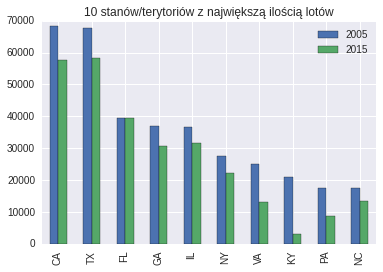

In [35]:
bar_nested = ile_dokad.plot(kind = "bar")
plt.title("10 stanów/terytoriów z największą ilością lotów")
plt.show()

### Ile precent lotów to loty do Kalifornii? (2015)

In [36]:
dest2015 = pd.DataFrame(dane2015.DEST_STATE_ABR.value_counts())
CA = dest2015[dest2015.index == 'CA'].DEST_STATE_ABR
rest = dest2015[dest2015.index != 'CA'].DEST_STATE_ABR.sum()

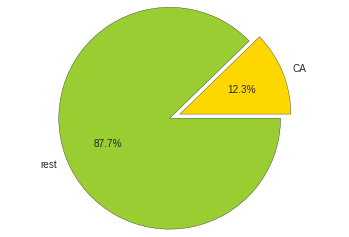

In [37]:
labels = ['CA', 'rest']
sizes = [CA, rest]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

### Ile procent lotów rozpoczyna się z opóźnieniem? Ile wylatuje wcześniej? (2015)

In [38]:
opoznienie = pd.DataFrame(dane2015.DEP_DELAY_GROUP.value_counts().sort_index())
opoznienie

,DEP_DELAY_GROUP
-2,1946
-1,255453
0,109934
1,34459
2,17906
3,11003
4,7178
5,4990
6,3617
7,2648


In [39]:
wczesniej = opoznienie.loc[-2:-1].sum()
o_czasie = opoznienie.loc[0:0].sum()
pozniej = opoznienie.loc[1:].sum()
opoznienie_agg = pd.DataFrame([wczesniej, o_czasie, pozniej], index = ['wcześniej', 'o czasie', 'później'])
opoznienie_agg.columns = ["liczba_lotow"]
opoznienie_agg

,liczba_lotow
wcześniej,257399
o czasie,109934
później,90978


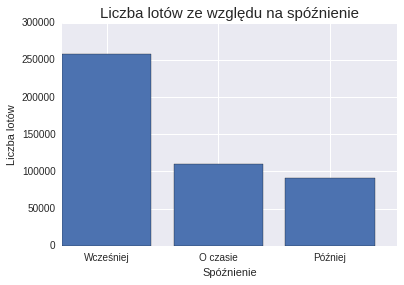

In [40]:
width = 0.8
ind = np.arange(3)
plt.bar(left = ind, height = (wczesniej[0], o_czasie[0], pozniej[0]), width = width)
plt.title('Liczba lotów ze względu na spóźnienie', fontsize = 15)
plt.ylabel('Liczba lotów')
plt.xlabel('Spóźnienie')
plt.xticks(ind + width/2., ('Wcześniej', 'O czasie', 'Później'))
plt.show()

### Wykres liczby anulowań od dnia miesiąca

In [151]:
anul2005 = dane2005.groupby("FL_DATE").sum()[["CANCELLED"]]
anul2015 = dane2015.groupby("FL_DATE").sum()[["CANCELLED"]]
anul2015.head()

,CANCELLED
FL_DATE,
2015-01-01,466
2015-01-02,257
2015-01-03,331
2015-01-04,433
2015-01-05,435


In [154]:
new_index = list()
for i in anul2005.index:
    new_index.append(i[8:])
new_index[0:5]

['01', '02', '03', '04', '05']

In [191]:
new_anul = pd.DataFrame({'2005': list(anul2005.CANCELLED), '2015': list(anul2015.CANCELLED)}, index = new_index)
new_anul.index.name = 'Dzień'
new_anul

,2005,2015
Dzień,,
01,212,466
02,184,257
03,330,331
04,589,433
05,1473,435
06,886,395
07,484,303
08,406,813
09,302,469


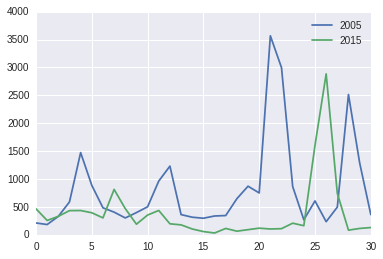

In [194]:
plt.plot(new_anul)
plt.legend(['2005', '2015'])
plt.show()

### Ile lotów z jednego stanu do drugiego? (2015)

In [41]:
stany = dane2015[["ORIGIN_STATE_ABR", "DEST_STATE_ABR"]]
stany_agg = stany.groupby(["ORIGIN_STATE_ABR", "DEST_STATE_ABR"])["ORIGIN_STATE_ABR"].count()
stany_agg

ORIGIN_STATE_ABR  DEST_STATE_ABR
AK                AK                1576
                  AZ                  39
                  CA                  24
                  CO                  31
                  HI                  44
                  IL                   8
                  MN                  35
                  NV                  14
                  OR                  73
                  WA                 723
AL                CO                  57
                  FL                 181
                  GA                 946
                  IL                 195
                  MD                  58
                  MI                  71
                  NV                  31
                  NY                  48
                  TX                 814
                  VA                   2
AR                AZ                  31
                  CO                  75
                  GA                 383
                  IL    

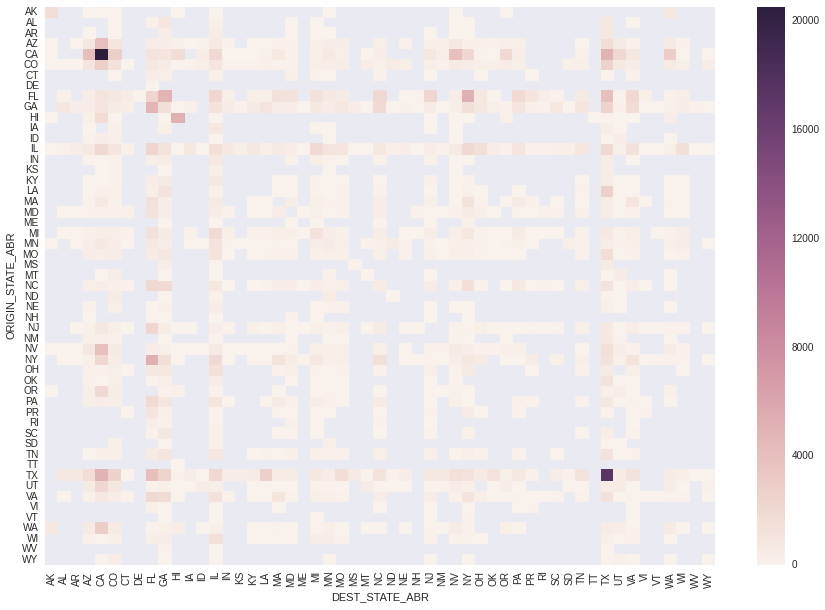

In [42]:
fig, stany_plot = plt.subplots()
fig.set_size_inches(15, 10)
stany_plot = sns.heatmap(stany_agg.unstack())

Heatmapa raczej nie jest powalająca. Generalnie widać, że najwięcej lotów jest do Texasu i Californi.

In [43]:
states.Description[states.Code.isin(["CA", "TX"])]

6     California
57         Texas
Name: Description, dtype: object

### Jak długość lotu skorelowana jest z opóźnieniem? (2015)

Uwaga - wyres liczy się dobre kilkadziesiąt minut. I jak widać raczej niewiele z niego wynika...

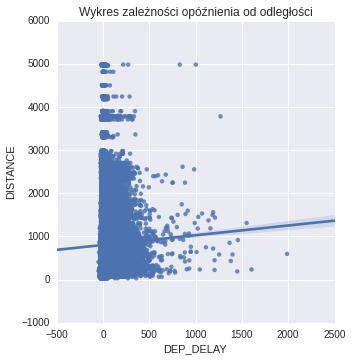

In [47]:
g = sns.lmplot(x = "DEP_DELAY", y = "DISTANCE", data = dane2015)
plt.title("Wykres zależności opóźnienia od odległości")
plt.show()

### Czy wielkość opóźnienia odlotu jest skorelowana z opoźnieniem przylotu? (2015)

Tutaj widać już natomiast całkiem ładną zależność, że najczęściej jeżeli samolot wyruszy z opóźnieniem to z takim opoźnieniem też wyląduje (lub nawet większym).

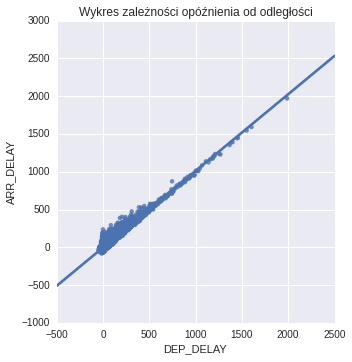

In [48]:
g = sns.lmplot(x = "DEP_DELAY", y = "ARR_DELAY", data = dane2015)
plt.title("Wykres zależności opóźnienia od odległości")
plt.show()

### Ile spóźnień jakiego typu w dany dzień? (2015)

In [66]:
spoznienia = dane2015[["DAY_OF_WEEK", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]].groupby("DAY_OF_WEEK").sum()
spoznienia

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
DAY_OF_WEEK,,,,,
1,258385,49478,223525,557,364287
2,196409,33535,156332,698,251467
3,175262,32191,141250,456,206204
4,253543,46695,179057,1118,284779
5,283669,34880,211976,647,371128
6,258232,29406,150969,1764,282227
7,282655,36902,214946,1460,423773


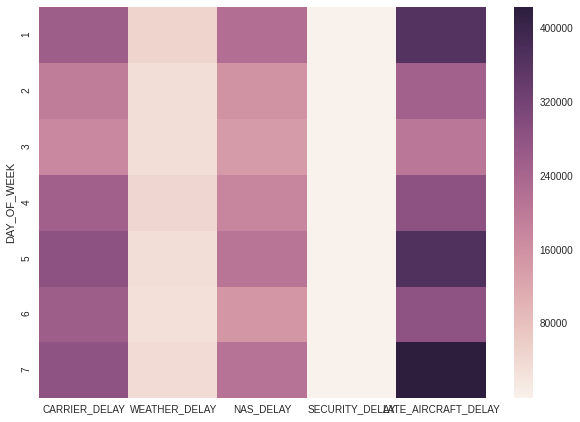

In [67]:
fig, spoznienia_plot = plt.subplots()
fig.set_size_inches(10, 7)
spoznienia_plot = sns.heatmap(spoznienia)

Największe spóźnienia (z największą ilością minut) to te związane z opóźnieniem samolotu, najmniej czasu i najmniejsza ilośc to opóźnienia związane z ochroną i bezpieczeństwem. Najwięcej spóźenień jest w niedzieję, poniedziałek i piątek.

### Ile procent lotów jest anulowana i z jakich powodów? (2015)

In [87]:
anulowania = dane2015[["CANCELLED", "CANCELLATION_CODE"]]
frakcja_anulowanych = anulowania.CANCELLED[dane2015.CANCELLED == 1].count()/anulowania.CANCELLED.count()
print("Procent anulowanych lotów w styczniu 2015 to " + str(frakcja_anulowanych))

Procent anulowanych lotów w styczniu 2015 to 0.0254953528751


In [95]:
anulowane = anulowania[anulowania.CANCELLED == 1]
anulowane_agg = anulowane.groupby("CANCELLATION_CODE").count()
anulowane_agg

,CANCELLED
CANCELLATION_CODE,
A,2874
B,7020
C,2087
D,1


In [98]:
anulowane_kod = pd.merge(anulowane_agg, cancel, how = "left", left_index = True, right_on = "Code")
anulowane_kod = anulowane_kod[["Description", "CANCELLED"]]
anulowane_kod

,Description,CANCELLED
0,Carrier,2874
1,Weather,7020
2,National Air System,2087
3,Security,1
